In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/train_clean.csv")
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [12]:
# Drop 'id' for ML / visualization
df_ml = df.drop(columns=["id"])

# Separate features and target
features = df_ml.drop(columns=["defects"])

# Identify numerical and categorical features
numerical_features = features.select_dtypes(include=["int64", "float64"]).columns
categorical_features = features.select_dtypes(include=["object", "category", "bool"]).columns

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')
Categorical features: Index([], dtype='object')


In [5]:
numerical_features = [col for col in numerical_features if col != "id"]

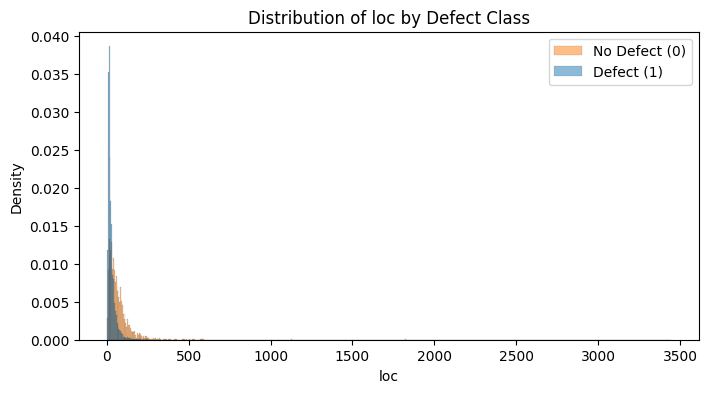

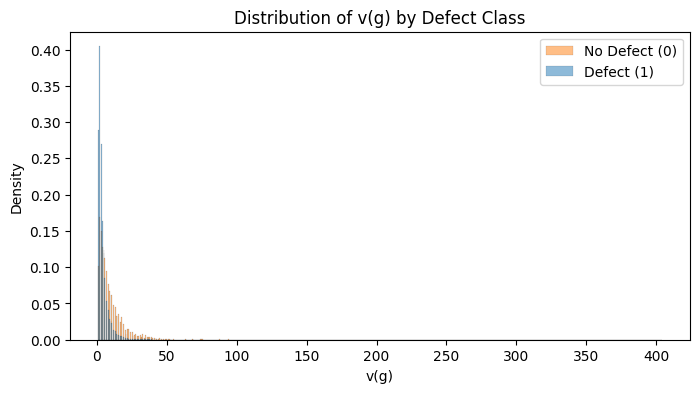

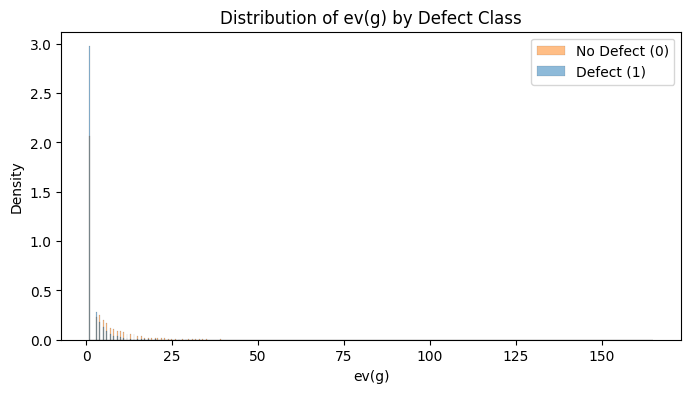

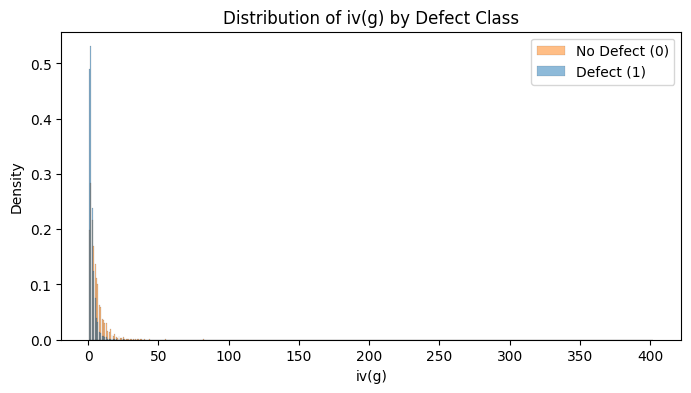

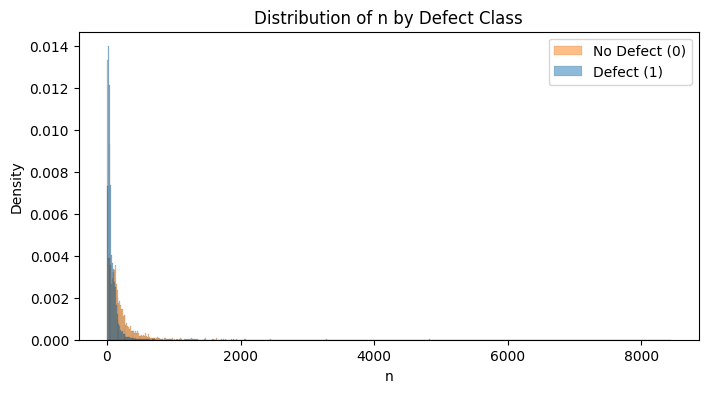

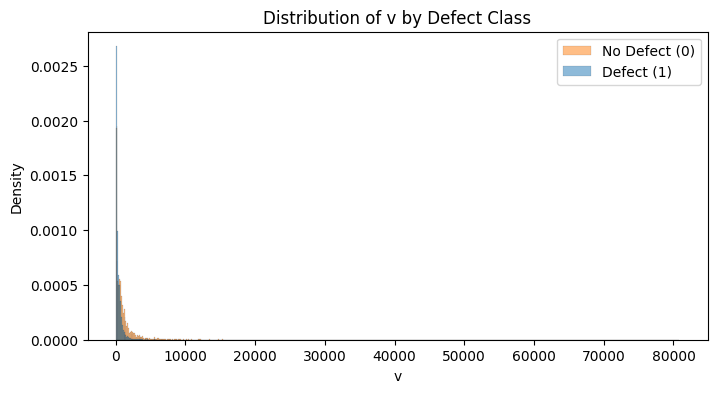

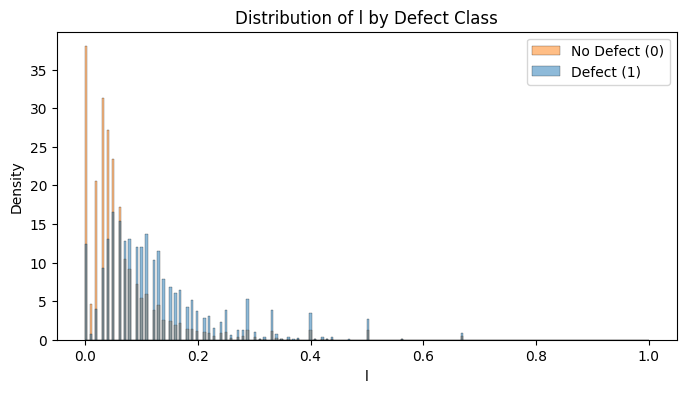

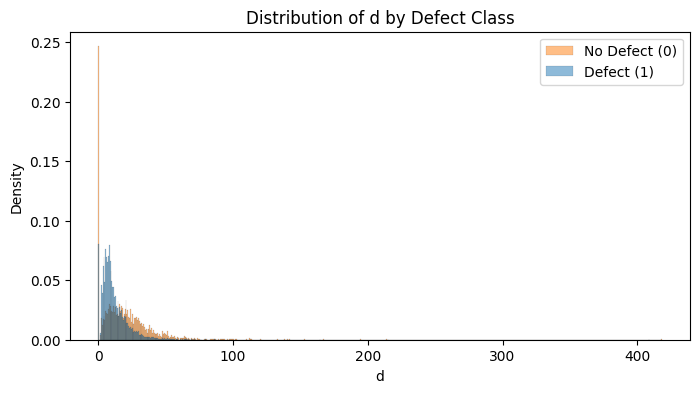

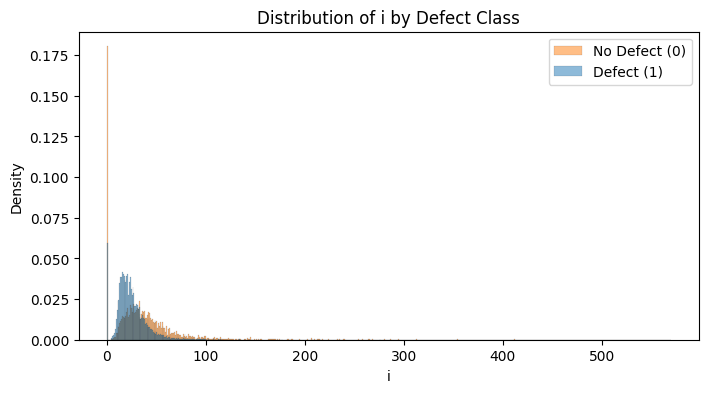

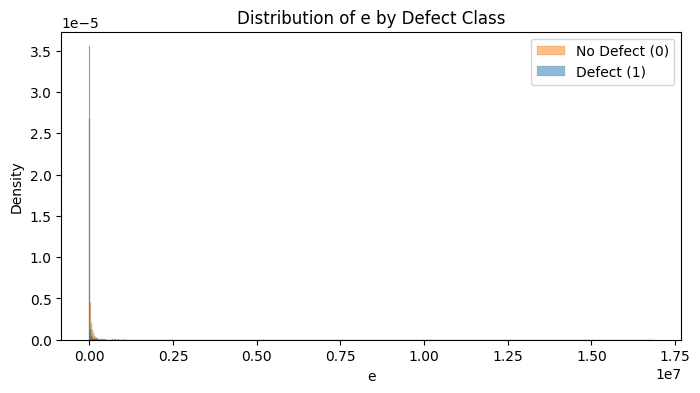

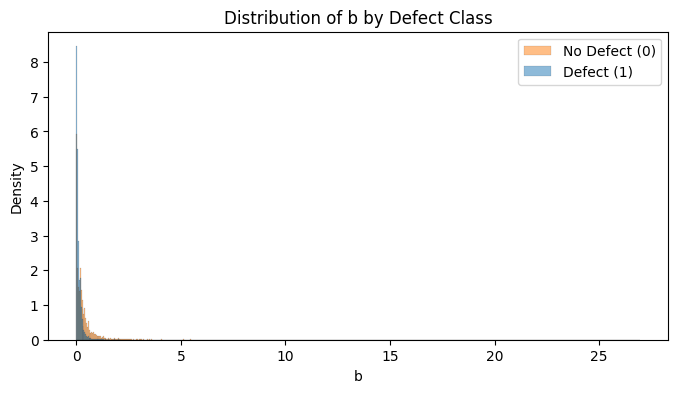

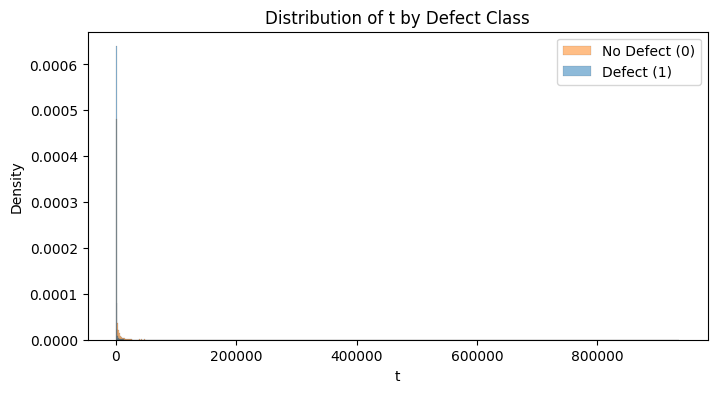

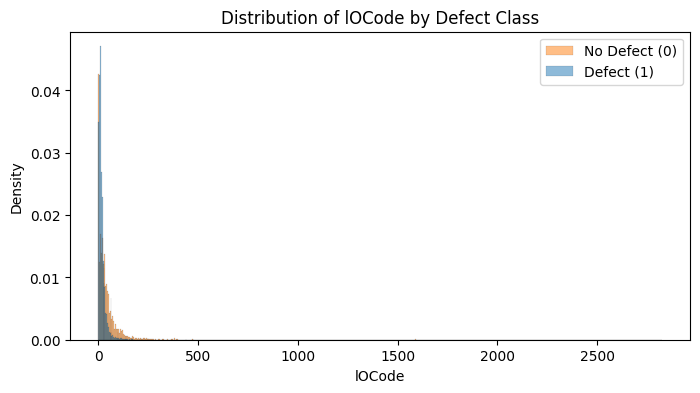

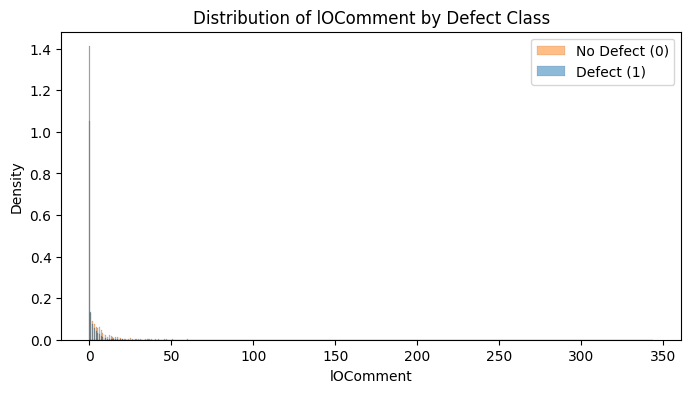

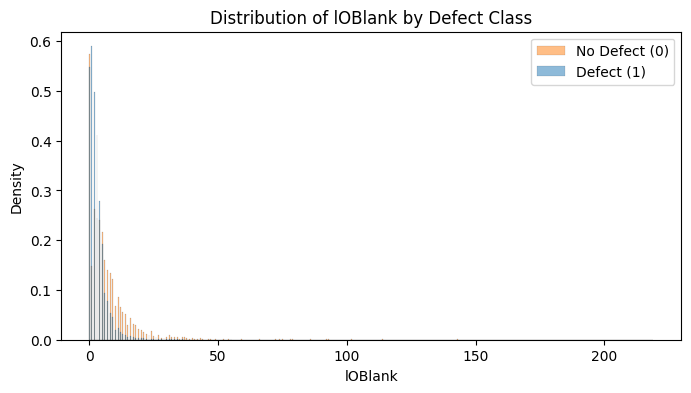

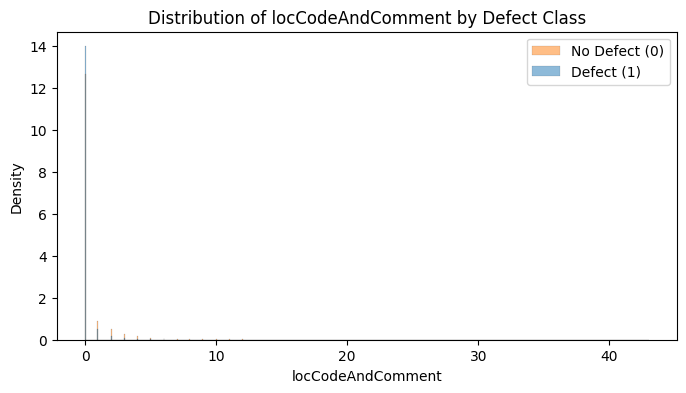

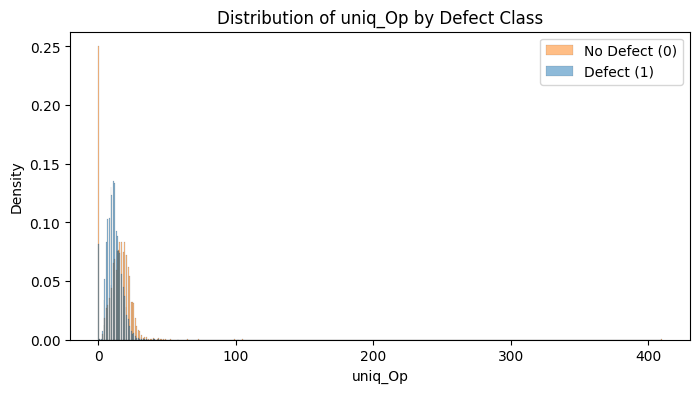

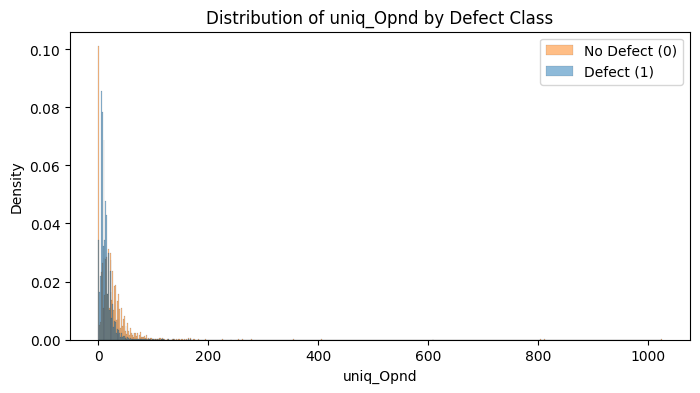

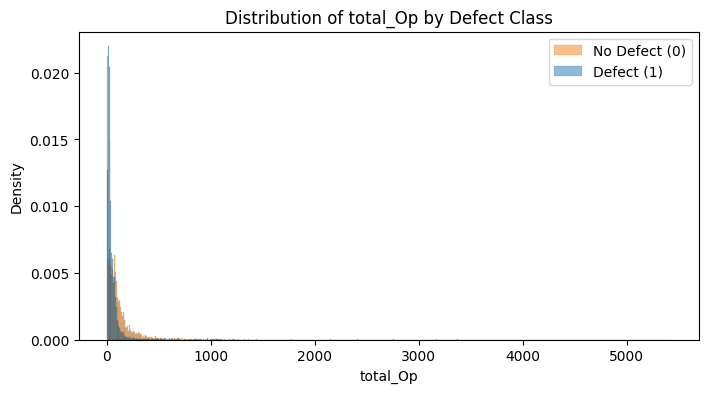

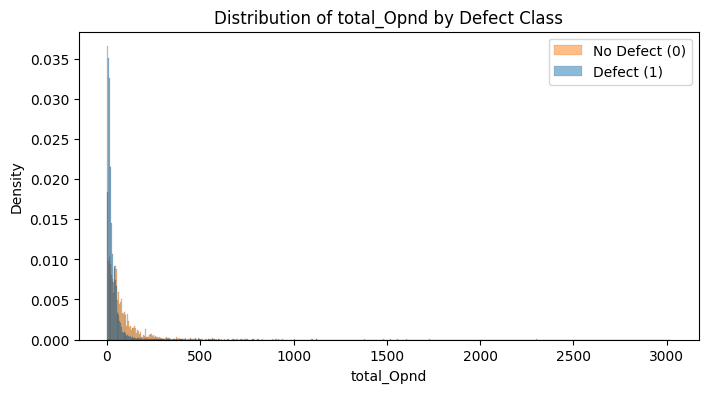

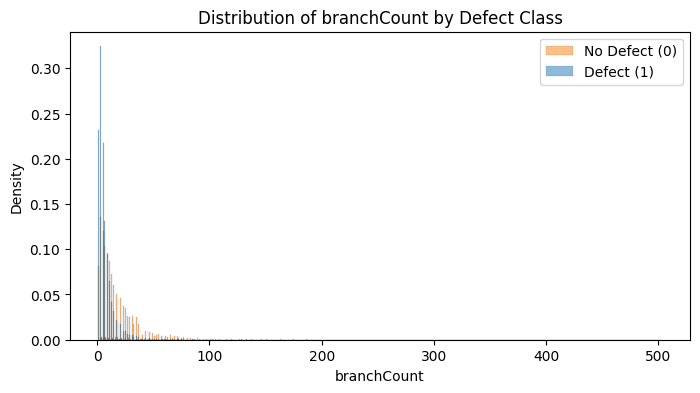

In [13]:
# Plot histograms for numerical features
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_ml, x=col, hue="defects", kde=False, stat="density", common_norm=False)
    plt.title(f"Distribution of {col} by Defect Class")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(labels=["No Defect (0)", "Defect (1)"])
    plt.show()

In [16]:
summary_stats = {}

for col in numerical_features:
    stats_by_class = df.groupby("defects")[col].agg(["mean", "median", "std", "min", "max"])
    summary_stats[col] = stats_by_class

# Display all summaries
for feature, stats in summary_stats.items():
    print(f"\n--- {feature} ---")
    display(stats)


--- loc ---


,mean,median,std,min,max
defects,,,,,
0,27.219329,19.0,36.144843,1.0,3442.0
1,71.905350,51.0,84.568143,4.0,2224.0



--- v(g) ---


,mean,median,std,min,max
defects,,,,,
0,4.204463,3.0,5.236932,1.0,404.0
1,9.888354,7.0,12.524562,1.0,404.0



--- ev(g) ---


,mean,median,std,min,max
defects,,,,,
0,2.193344,1.0,3.234127,1.0,133.0
1,5.068678,1.0,7.249367,1.0,165.0



--- iv(g) ---


,mean,median,std,min,max
defects,,,,,
0,2.762919,2.0,3.878967,1.0,402.0
1,6.009886,4.0,8.698204,1.0,402.0



--- n ---


,mean,median,std,min,max
defects,,,,,
0,72.744635,45.0,115.774046,0.0,8441.0
1,178.246358,108.5,273.675219,0.0,5669.0



--- v ---


,mean,median,std,min,max
defects,,,,,
0,379.242336,202.050,836.532941,0.0,80843.08
1,1080.952670,554.505,2087.306593,0.0,55140.81



--- l ---


,mean,median,std,min,max
defects,,,,,
0,0.125356,0.10,0.101461,0.0,1.00
1,0.064811,0.04,0.079031,0.0,0.67



--- d ---


,mean,median,std,min,max
defects,,,,,
0,11.832374,9.00,10.882076,0.0,418.2
1,19.992771,16.67,20.598222,0.0,418.2



--- i ---


,mean,median,std,min,max
defects,,,,,
0,24.992160,22.06,17.852887,0.0,569.78
1,36.379374,31.58,33.425633,0.0,569.78



--- e ---


,mean,median,std,min,max
defects,,,,,
0,11015.031194,1774.99,115280.003327,0.0,12120796.16
1,54424.728002,9793.69,336808.795900,0.0,16846621.12



--- b ---


,mean,median,std,min,max
defects,,,,,
0,0.126047,0.07,0.265608,0.0,18.38
1,0.360409,0.18,0.708505,0.0,26.95



--- t ---


,mean,median,std,min,max
defects,,,,,
0,609.609253,99.04,5957.835582,0.0,673377.60
1,2955.791438,544.09,17430.730138,0.0,935923.39



--- lOCode ---


,mean,median,std,min,max
defects,,,,,
0,17.573768,12.0,27.220173,0,2824
1,40.643774,26.0,60.118393,0,1739



--- lOComment ---


,mean,median,std,min,max
defects,,,,,
0,1.117625,0.0,3.748257,0,206
1,4.013441,0.0,9.964590,0,344



--- lOBlank ---


,mean,median,std,min,max
defects,,,,,
0,3.089074,2.0,4.467775,0,219
1,7.019424,4.0,9.983721,0,219



--- locCodeAndComment ---


,mean,median,std,min,max
defects,,,,,
0,0.124601,0.0,0.708733,0,38
1,0.442291,0.0,1.615747,0,43



--- uniq_Op ---


,mean,median,std,min,max
defects,,,,,
0,11.244006,11.0,5.418161,0.0,155.0
1,14.121315,15.0,9.717754,0.0,410.0



--- uniq_Opnd ---


,mean,median,std,min,max
defects,,,,,
0,13.189901,11.0,12.563003,0.0,811.0
1,23.809053,19.0,28.531622,0.0,1026.0



--- total_Op ---


,mean,median,std,min,max
defects,,,,,
0,43.450018,27.0,71.264033,0.0,5420.0
1,106.006634,65.0,166.920801,0.0,3368.0



--- total_Opnd ---


,mean,median,std,min,max
defects,,,,,
0,29.440183,18.0,48.079757,0.0,3021.0
1,72.721731,44.0,115.506056,0.0,3021.0



--- branchCount ---


,mean,median,std,min,max
defects,,,,,
0,7.320728,5.0,9.645063,1.0,485.0
1,18.434270,13.0,22.441229,1.0,503.0


All features in this dataset are numerical; there are no categorical features.

Most promising features:
[loc, v(g), ev(g), iv(g), n, v, e, b, t, lOCode, lOComment, lOBlank, locCodeAndComment, uniq_Opnd, total_Op, total_Opnd, branchCount].
These features show clear differences between defect (1) and non-defect (0) classes.

Moderate features:
l, d, i, uniq_Op
These show some differences, but overlap between classes is higher.

In [15]:
df_ml.to_csv("../data/train_clean_final.csv", index=False)